# **Árvore de Regressão e Random Forest**

* Parte 1: Entendimento e divisão do dataset
* Parte 2: Aplicação do algoritmo DecisionTreeRegressor
* Parte 3: Avaliação de desempenho
* Parte 4: Aplicação do algoritmo RandomForest
* Parte 5: Avaliação de desempenho

# <font color=yellow>**Parte 1**: Entendimento e divisão do dataset

Definição das variáveis
- year: ano (0: 2011, 1: 2012)
- month: mês (1 a 12)
- holiday: dado boleano indicando se o dia é feriado ou não
- weekday: dia da semana
- workingday: dado boleano indicando se é dia útil ou não
- temp: temperatura normalizada em graus Celsius
- feeling_temp: sensação térmica normalizada em graus Celsius
- humidity: umidade normalizada
- windspeed: velocidade do vento normalizada
- total_rental_bikes: contagem total de bicicletas alugadas
- season_: variável dummy indicando estação do ano
- weathersit_: variável dummy indicando condição climática

In [ ]:
import pandas as pd

# Leitura da base de dados
df = pd.read_csv('bike_rent.csv')
df.head()

,year,month,holiday,weekday,workingday,temp,feeling_temp,humidity,windspeed,total_rental_bikes,season_Fall,season_Spring,season_Summer,season_Winter,weathersit_Clear,weathersit_Mist,weathersit_Snow
0,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,985,0,1,0,0,0,1,0
1,0,1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,0,1,0,0,0,1,0
2,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,0,1,0,0,1,0,0
3,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,1562,0,1,0,0,1,0,0
4,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,1600,0,1,0,0,1,0,0


In [ ]:
# Definindo as variáveis independentes e a variável dependente
y = df.loc[:,'total_rental_bikes'].values
X = df.drop(['total_rental_bikes'], axis='columns').values

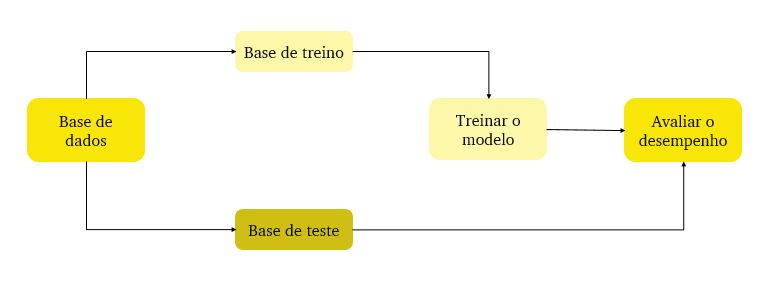

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo a base de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

# <font color=yellow>**Parte 2**: Aplicação do algoritmo DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Criando a classe DecisionTreeRegressor()
regressor = DecisionTreeRegressor()

# Ajustando o algoritmo a base de dados
regressor.fit(X_train, y_train)

# Prevendo os resultados
y_pred = regressor.predict(X_test)

In [ ]:
# Comparando os valores reais com os valores previstos
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df.head()

,Real Values,Predicted Values
0,4990,6572.0
1,5409,6460.0
2,1416,1406.0
3,2455,2999.0
4,3811,3570.0


In [ ]:
import plotly.express as px

# Plotando gráfico
fig = px.line(df, y=['Real Values', 'Predicted Values'])
fig.show()

# <font color=yellow>**Parte 3**: Avaliação de desempenho

Principais métricas para avaliação de desempenho de um modelo de regressão:

* **R² (Coeficiente de Determinação)** - varia de 0 a 1 e representa a proporção da variabilidade na variável dependente que pode ser explicada pelo modelo.
* **MAE (Erro Absoluto Médio)** - avalia a precisão de um modelo prever os dados já observados, sendo a média das diferenças absolutas entre as previsões do modelo e os valores reais.
* **MSE (Erro Quadrático Médio)** - também avalia a precisão do modelo, sendo calculado a partir da média das diferenças ao quadrado entre os valores previstos e os valores reais, penalizando mais erros maiores.
* **RMSE (Raiz do Erro Quadrático Médio)** - é a raiz quadrada do MSE, tornando-se assim uma métrica mais fácil de ser interpretar, já que fica na mesma unidade que o dado original.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculando R²
r2 = r2_score(y_test, y_pred)

# Calculando MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculando MSE
mse = mean_squared_error(y_test, y_pred)

# Calculando RMSE
rmse = np.sqrt(mse)

print('R2:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R2: 0.691824486917054
MAE: 728.027027027027
MSE: 1223656.4594594594
RMSE: 1106.1900647987486


Um dos principais problemas do algoritmo da Árvore de Decisão é o **OVERFITTING**: 
- Quando na base de treino o modelo tem um bom desempenho, mas na base de teste tem um desempenho ruim
- O modelo se ajustou de forma tão precisa aos dados de treinamento que aprende o ruído aleatório dos dados, mas não generaliza bem para novos dados.



# <font color=yellow>**Parte 4**: Aplicação do algoritmo RandomForest

Parâmetros:
- n_estimators: número de árvores na floresta
- max_features: número máximo de recursos considerados para dividir um nó
- max_depth: número máximo de níveis em cada árvore de decisão
- random_state: semente usada para gerar números aleatórios durante a execução do modelo

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criando a classe RandomForestRegressor()
rf_regressor = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)

# Ajustando o algoritmo a base de dados
rf_regressor.fit(X_train, y_train)

# Prevendo os resultados
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Comparando os valores reais com os valores previstos
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df.head()

,Real Values,Predicted Values
0,4990,5634.898008
1,5409,4950.054576
2,1416,1586.707597
3,2455,2748.456218
4,3811,3561.415500


In [ ]:
# Plotando gráfico
fig = px.line(df, y=['Real Values', 'Predicted Values'])
fig.show()

# <font color=yellow>**Parte 5**: Avaliação de desempenho

In [ ]:
# Calculando R²
r2 = r2_score(y_test, y_pred)

# Calculando MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculando MSE
mse = mean_squared_error(y_test, y_pred)

# Calculando RMSE
rmse = np.sqrt(mse)

print('R2:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R2: 0.8642877210224856
MAE: 476.686729476631
MSE: 538865.6779946786
RMSE: 734.0747087283954
